In [32]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.integrate import quad
from scipy import special
from classes import P_dist_handler, H_pot
plt.rc('animation', html='jshtml')

In [33]:
ks = [1.0, 10.0]
x_0s = [0.0, 1.0]
Ns = [100000, 100000]
#H_pot.T0 = 0.15 #WE SET k_B*T = 0.15
#P_dist_handler.T0 = 0.15

def Y(x, T, k, x_0):
    T0 = 0.15
    return np.exp(-T0/2.0*k*(x-x_0)**2/T)
pots = []

for k, x_0, N in zip(ks, x_0s, Ns):
    x_min = x_0-4.0
    x_max = x_0+4.0
    p_handler = P_dist_handler(x_min=x_min, x_max=x_max, Y=Y, N=N)
    pot = H_pot(T=0.15, k=k, x_0=x_0, p_handler=p_handler)
    pots.append(pot)


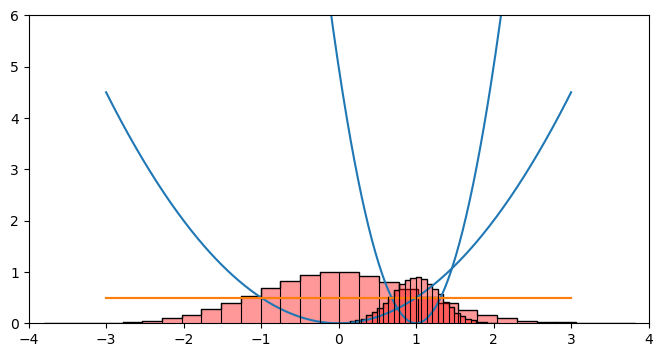

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlim([-4.0, 4.0])
ax.set_ylim([0.0, 6.0])
for pot in pots:
    pot.plot(ax, plot_range=[-3.0,3.0])

In [35]:
for pot in pots:
    print(pot.v_avg)

0.501049371447148
0.49583157623255375


In [37]:
pot_ref = pots[0]
pot_use = pots[1]

In [ ]:
pot_use.use_H_pot_ref()